# ОИАД. Лабораторная работа №4

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score

Использован набор данных **famcs_students.csv**

binary_cols = [ss, interest, weekend_study, bad_sleep, glasses, anime, study_form, literature]

Использована целевую переменную $y=$ binary_cols[N % 8] = **glasses**.

Необходимо построить несколько моделей бинарной классификации $y$ по признакам $X$.

Данные разделены случайно на 3 выборки:
* тренировочная (70%) - для определения параметров модели
* валидацонная (15%) - для подбора гиперпараметров модели
* тестовую (15%) - итоговая оценка качества

In [2]:
df = pd.read_csv('famcs_students.csv')
df.head()

,cource,group,stream,sex,age,ss,interest,os,weekend_study,bad_sleep,...,social,sport,miss,study_form,foot_size,eye_color,score,retake,hostel,literature
0,4,11,Прикладная информатика,М,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Редко, легкая физкультура",3.0,Бюджет,48.0,Карие,9.2,0,"Нет, я из Минска",Да
1,4,11,Прикладная информатика,Ж,20.0,Нет,Программирование,MacOS,Нет,Нет,...,Экстраверт,"Да, я спортсмен",5.0,Бюджет,39.0,Зеленые,8.8,0,"Нет, я из Минска",Да
2,4,11,Прикладная информатика,Ж,19.0,Нет,Программирование,MacOS,Да,Нет,...,Экстраверт,Вообще нет,10.0,Бюджет,41.0,Карие,8.8,0,"Нет, я из Минска",Да
3,4,11,Прикладная информатика,Ж,20.0,Нет,Математика,MacOS,Да,Да,...,Экстраверт,"Да, я спортсмен",3.0,Бюджет,36.0,Карие,8.8,0,"Нет, я из Минска",Да
4,4,11,Прикладная информатика,М,20.0,Нет,Математика,Windows,Да,Нет,...,Интроверт,Вообще нет,1.0,Бюджет,46.0,Зеленые,9.0,0,"Нет, я из Минска",Да


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cource           127 non-null    int64  
 1   group            127 non-null    int64  
 2   stream           127 non-null    object 
 3   sex              127 non-null    object 
 4   age              127 non-null    float64
 5   ss               127 non-null    object 
 6   interest         127 non-null    object 
 7   os               127 non-null    object 
 8   weekend_study    127 non-null    object 
 9   bad_sleep        127 non-null    object 
 10  glasses          127 non-null    object 
 11  work_experience  127 non-null    object 
 12  ai               127 non-null    object 
 13  height           127 non-null    float64
 14  anime            127 non-null    object 
 15  social           127 non-null    object 
 16  sport            127 non-null    object 
 17  miss            

In [4]:
columns=['sex', 'age', 'weekend_study', 'bad_sleep', 'sport', 'score', 'literature', 'glasses']
features=columns.copy()
target=features.pop(7)

In [5]:
dataframe = pd.DataFrame(df, columns=columns)
dataframe.head()

,sex,age,weekend_study,bad_sleep,sport,score,literature,glasses
0,М,20.0,Да,Да,"Редко, легкая физкультура",9.2,Да,Нет
1,Ж,20.0,Нет,Нет,"Да, я спортсмен",8.8,Да,Нет
2,Ж,19.0,Да,Нет,Вообще нет,8.8,Да,Нет
3,Ж,20.0,Да,Да,"Да, я спортсмен",8.8,Да,Нет
4,М,20.0,Да,Нет,Вообще нет,9.0,Да,Нет


In [6]:
print(dataframe.sex.unique())
print(dataframe.weekend_study.unique())
print(dataframe.bad_sleep.unique())
print(dataframe.sport.unique())
print(dataframe.literature.unique())

['М' 'Ж']
['Да' 'Нет']
['Да' 'Нет']
['Редко, легкая физкультура' 'Да, я спортсмен' 'Вообще нет']
['Да' 'Нет']


In [7]:
dataframe['sex_cat'] = 0
dataframe['weekend_study_cat'] = 0
dataframe['bad_sleep_cat'] = 0
dataframe['literature_cat'] = 0
dataframe['glasses_cat'] = 0

for i in range(len(dataframe)):
    dataframe.loc[i, "sex_cat"] = 0 if dataframe.loc[i, 'sex'] == 'Ж' else 1 
    dataframe.loc[i, "weekend_study_cat"] = 0 if dataframe.loc[i, 'weekend_study'] == 'Нет' else 1 
    dataframe.loc[i, "bad_sleep_cat"] = 0 if dataframe.loc[i, 'bad_sleep'] == 'Нет' else 1 
    dataframe.loc[i, "literature_cat"] = 0 if dataframe.loc[i, 'literature'] == 'Нет' else 1   
    dataframe.loc[i, "glasses_cat"] = 0 if dataframe.loc[i, 'glasses'] == 'Нет' else 1   

def sports_transform(x):
    if x == 'Вообще нет':
        return 0
    elif x == 'Редко, легкая физкультура':
        return 1
    else:
        return 2
    
dataframe['sport_cat'] = dataframe['sport'].apply(sports_transform)

dataframe.drop(columns=['sex', 'weekend_study', 'bad_sleep', 'sport', 'literature', 'glasses'], inplace=True)
dataframe.head()

,age,score,sex_cat,weekend_study_cat,bad_sleep_cat,literature_cat,glasses_cat,sport_cat
0,20.0,9.2,1,1,1,1,0,1
1,20.0,8.8,0,0,0,1,0,2
2,19.0,8.8,0,1,0,1,0,0
3,20.0,8.8,0,1,1,1,0,2
4,20.0,9.0,1,1,0,1,0,0


In [8]:
X = dataframe.copy()
train_df, valtest_df = train_test_split(X, test_size=0.3)
val_df, test_df = train_test_split(valtest_df, test_size=0.5)

train_X = train_df.drop(['glasses_cat'], axis=1)
train_Y = train_df.glasses_cat

val_X = val_df.drop(['glasses_cat'], axis=1)
val_Y = val_df.glasses_cat

test_X = test_df.drop(['glasses_cat'], axis=1)
test_Y = test_df.glasses_cat

train_X.head()

,age,score,sex_cat,weekend_study_cat,bad_sleep_cat,literature_cat,sport_cat
51,20.0,7.60,1,1,1,1,2
53,20.0,7.50,0,0,0,0,1
42,21.0,6.70,1,1,0,0,2
67,21.0,6.29,1,1,1,1,0
79,20.0,9.00,1,1,1,0,1


## 0. Тривиальный классификатор
Всегда выдает наиболее частый класс

In [9]:
counter = Counter(train_Y.to_numpy())
most_freq = counter.most_common(1)
print(f'The most frequent class: {most_freq[0][0]} with {most_freq[0][1]} samples')

The most frequent class: 1 with 44 samples


In [10]:
class TrivialPredictor():
    def __init__(self):
        self.output = None
        
    def fit(self, labels: pd.Series):
        counter = Counter(labels.to_numpy())
        most_freq = counter.most_common(1)
        self.output = most_freq[0][0].item()
        return self.output

    def predict(self, train_data: pd.DataFrame):
        return [self.output for _ in range(train_data.shape[0])]

In [11]:
trivial_pred = TrivialPredictor()
trivial_pred.fit(train_Y)
preds = trivial_pred.predict(val_X)
print(f'Predictions: {preds[:15]}...')

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]...


## 1. Наивный байесовский классификатор
Алгоритм реализуйте сами!

In [12]:
class GaussianNB():
    def __init__(self, n_classes=2):
        self.output = None
        self.num_classes = n_classes
        self.absolute_aprior_p = 1.0 / n_classes
        self.mean = None
        self.std = None

    def pdf(self, mean, std, x):
        return 1.0 / np.sqrt(2*np.pi*std**2) * np.exp(-0.5*((x-mean)/std)**2)
        
    def fit(self, train_data:pd.DataFrame, labels: pd.Series):
        self.mean = np.array([np.mean(train_data[labels == cls], axis=0) for cls in range(self.num_classes)])
        self.std = np.array([np.std(train_data[labels == cls], axis=0) for cls in range(self.num_classes)])
        return self.mean, self.std

    def predict(self, data: pd.DataFrame, labels=None):
        conditional_aprior_p = np.array([self.pdf(self.mean, self.std, data.iloc[i].to_numpy()) for i in range(len(data))])
        preds = self.absolute_aprior_p * np.prod(conditional_aprior_p, axis=2)
        final_preds = np.argmax(preds, axis=1)
        return final_preds, labels.to_numpy()

In [13]:
gaussian_pred = GaussianNB()
gaussian_pred.fit(train_X, train_Y)
preds, trues = gaussian_pred.predict(val_X, val_Y)
print(f'Predictions: {preds}')
print(f'True vals:   {trues}')

Predictions: [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1]
True vals:   [1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1]


## 2. Метод k-ближайших соседей
Алгоритм реализуйте сами!
Подберите оптимальный гиперпараметр $k$.

In [14]:
class KNN():
    def __init__(self, k=5):
        self.k = k
        self.data = None
        self.true_labels = None
        self.val_outputs = None
        
    def get_distance(self, a, b):
        return np.sqrt(np.sum((a-b)**2))
        
    def fit(self, train_data:pd.DataFrame, labels: pd.Series):
        self.data = train_data
        self.true_labels = labels
        return labels
        
    def predict(self, data: pd.DataFrame, labels=None):
        distances = {}
        preds = []
        for idx in range(data.shape[0]):
            counter = Counter([])
            for i in range(len(self.true_labels)):
                dist, cls = self.get_distance(self.data.iloc[i], data.iloc[idx]), self.true_labels.iloc[i]
                distances[dist] = cls

            sorted_items = sorted(distances.items())
            sorted_dict = dict(sorted_items)
            neighbours = list(sorted_dict.values())
            counter.update(neighbours[:self.k])
        
            most_freq = counter.most_common(1)
            pred = most_freq[0][0].item()

            preds.append(pred)
            
        return np.array(preds), labels.to_numpy()

In [15]:
best_k = 1
best_acc = 0
for k in range(1, len(val_Y), 2):
    knn_pred = KNN(k)
    knn_pred.fit(train_X, train_Y)
    knn_preds, trues = knn_pred.predict(val_X, val_Y)
    acc = accuracy_score(knn_preds, trues)
    print(f'Accuracy: {acc} for k={k}')
    if acc > best_acc:
        best_acc = acc
        best_k = k

print(f'Best K = {best_k}')

Accuracy: 0.47368421052631576 for k=1
Accuracy: 0.47368421052631576 for k=3
Accuracy: 0.47368421052631576 for k=5
Accuracy: 0.42105263157894735 for k=7
Accuracy: 0.42105263157894735 for k=9
Accuracy: 0.42105263157894735 for k=11
Accuracy: 0.47368421052631576 for k=13
Accuracy: 0.42105263157894735 for k=15
Accuracy: 0.42105263157894735 for k=17
Best K = 1


In [16]:
knn_pred = KNN(best_k)
knn_pred.fit(train_X, train_Y)
preds, trues = knn_pred.predict(val_X, val_Y)
print(f'Predictions: {preds}')
print(f'True vals:   {trues}')

Predictions: [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
True vals:   [1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1]


## 3. Логистическая регрессия
Алгоритм реализуйте сами!
Изобразите график зависимости метрик precision, recall от порога классификаци, а итоговый порог классификации выберите таким, при котором достигается максимум метрики f1. Используйте валидационную выборку.

In [17]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [67]:
class LogisticRegression():
    def __init__(self, n_classes=2, threshold=0.5):
        self.num_classes = n_classes
        self.w = None
        self.bias = None
        self.threshold = threshold

    def loss(self, y, y_hat):
        return -np.sum((y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, train_data:pd.DataFrame, labels: pd.Series, val_data:pd.DataFrame, val_labels: pd.Series, lr=1e-4, max_iter = 100000):
        w_cap = np.zeros(train_data.shape[1])
        b_cap = 0
        history = {
            'train_loss': []
        }
        for i in range(max_iter):
            y_hat = self.sigmoid(w_cap @ train_data.T + b_cap)
            cost_value = self.loss(labels.to_numpy(), y_hat)
            
            grad_w = (1/train_data.shape[0]) * np.dot(train_data.T, (y_hat-labels.T).T)
            grad_b = (1/train_data.shape[0]) * np.sum((y_hat-labels.T).T)
            
            grad_norm = np.linalg.norm(grad_w)
    
            w_cap = w_cap - lr * grad_w
            b_cap = b_cap - lr * grad_b
            
            if i % 10000 == 0:
                print(f"Iteration {i}, grad_norm: {grad_norm:.6f}")
                
            if (i % 1000 == 0):
                history['train_loss'].append(cost_value)

        best_threshold = 0.1
        best_f1 = 0
        val_metrics = {
            'recall': [],
            'precision': [],
            'f1': []
        }
        for thr in range(10, 100, 5):
            y_hat_val = self.sigmoid(w_cap @ val_data.T + b_cap)
            preds_val = np.array([1 if pred >= float(thr)/100 else 0 for pred in y_hat_val])
            recall = recall_score(val_labels, preds_val)
            precision = precision_score(val_labels, preds_val)
            f1 = f1_score(val_labels, preds_val)
            val_metrics['recall'].append(recall)
            val_metrics['precision'].append(precision)
            val_metrics['f1'].append(f1)
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = thr

        self.threshold = float(best_threshold)/100
        print(f'The best threshold set as {self.threshold}')
        
        self.w = w_cap
        self.bias = b_cap
        return history, val_metrics

    def predict(self, data: pd.DataFrame, labels=None):
        preds = self.sigmoid(self.w @ data.T + self.bias)
        final_preds = [1 if pred >= self.threshold else 0 for pred in preds]
        return final_preds, labels.to_numpy()

In [68]:
log_regression = LogisticRegression()
history, val_metrics = log_regression.fit(train_X, train_Y, val_X, val_Y)

Iteration 0, grad_norm: 0.108016
Iteration 10000, grad_norm: 0.058312
Iteration 20000, grad_norm: 0.046443
Iteration 30000, grad_norm: 0.040662
Iteration 40000, grad_norm: 0.036966
Iteration 50000, grad_norm: 0.034099
Iteration 60000, grad_norm: 0.031663
Iteration 70000, grad_norm: 0.029516
Iteration 80000, grad_norm: 0.027592
Iteration 90000, grad_norm: 0.025856
The best threshold set as 0.45


D:\anaconda3\envs\condaenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\anaconda3\envs\condaenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\anaconda3\envs\condaenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\anaconda3\envs\condaenv\Lib\site-packages\s

In [69]:
preds, trues = log_regression.predict(val_X, val_Y)
print(f'Predictions: {preds}')
print(f'True vals:   {trues}')

Predictions: [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
True vals:   [1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1]


In [43]:
import matplotlib.pyplot as plt

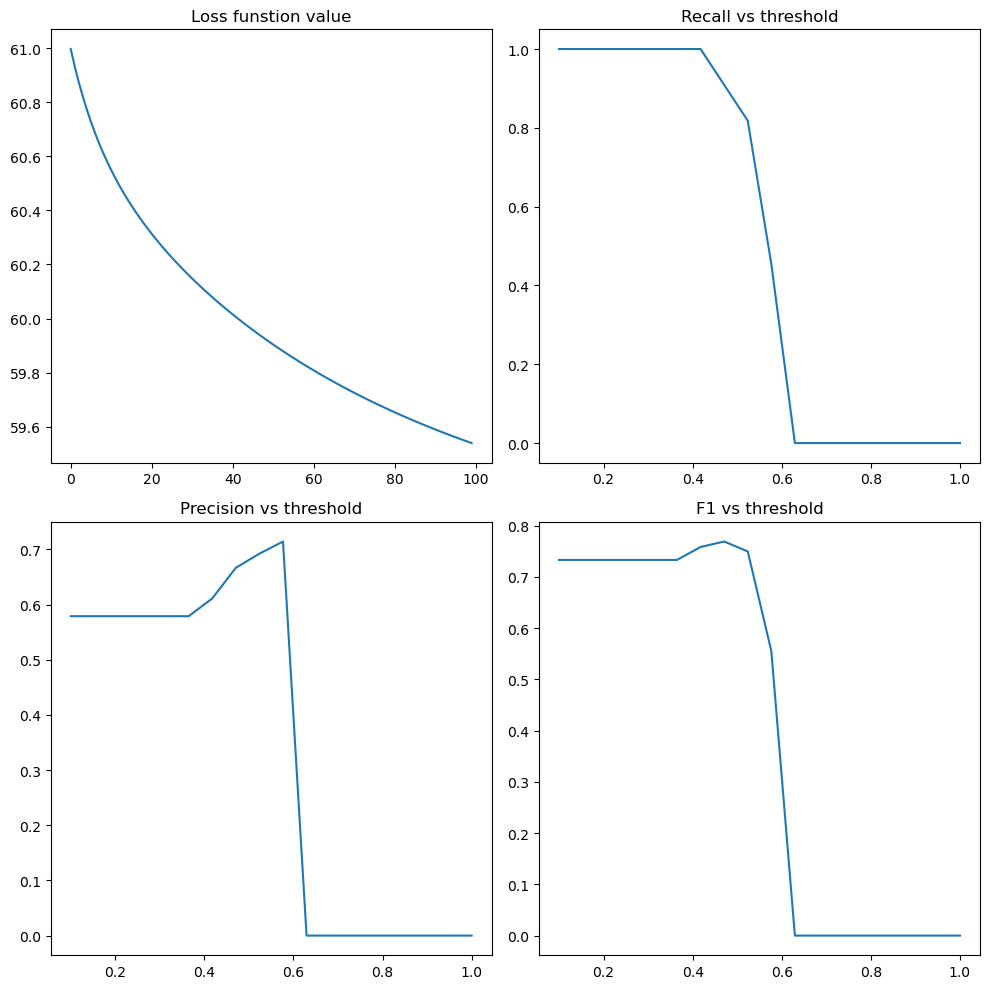

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0, 0].plot(history['train_loss'])
axes[0, 0].set_title("Loss funstion value")

axes[0, 1].plot(np.linspace(0.1, 1, 18), val_metrics['recall'])
axes[0, 1].set_title("Recall vs threshold")

axes[1, 0].plot(np.linspace(0.1, 1, 18), val_metrics['precision'])
axes[1, 0].set_title("Precision vs threshold")

axes[1, 1].plot(np.linspace(0.1, 1, 18), val_metrics['f1'])
axes[1, 1].set_title("F1 vs threshold")

plt.tight_layout()
plt.show()

## 4. Оценка качества
Для каждой построенной модели, по отложенной тестовой выборке оцените качество моделей:
* accuracy
* precision
* recall
* roc-auc
* постройте матрицу ошибок

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

====Trivial Predictor====
  -accuracy: 0.65
  -precision: 0.65
  -recall: 1.0
  -ROC-AUC: 0.5


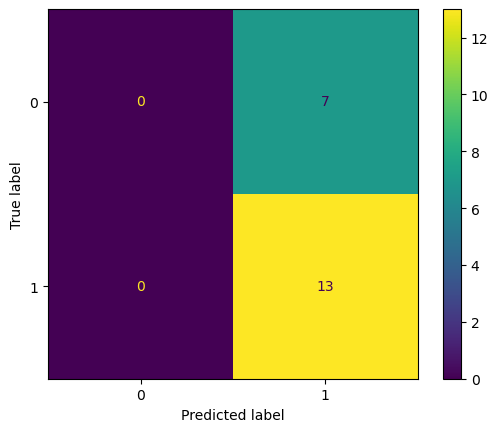

====Naive Bayes====
  -accuracy: 0.75
  -precision: 0.7222222222222222
  -recall: 1.0
  -ROC-AUC: 0.6428571428571428


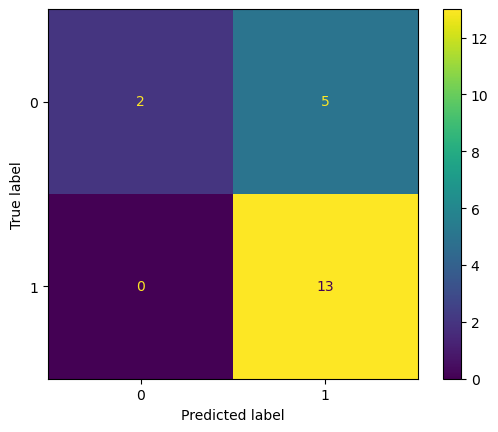

====KNN====
  -accuracy: 0.4
  -precision: 0.6666666666666666
  -recall: 0.15384615384615385
  -ROC-AUC: 0.5054945054945055


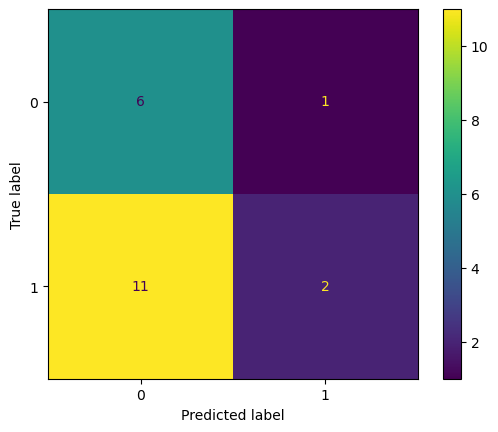

====Logistic Regression====
  -accuracy: 0.5
  -precision: 0.5882352941176471
  -recall: 0.7692307692307693
  -ROC-AUC: 0.38461538461538464


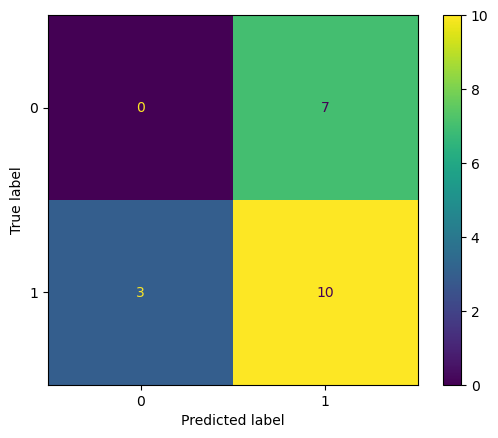

In [71]:
trivial_preds = trivial_pred.predict(test_X)
gaussianNB_preds, _ = gaussian_pred.predict(test_X, test_Y)
knn_preds, _ = knn_pred.predict(test_X, test_Y)
lr_preds, _ = log_regression.predict(test_X, test_Y)

trues = test_Y.to_numpy()

trivial_acc = accuracy_score(test_Y, trivial_preds)
trivial_precision = precision_score(test_Y, trivial_preds)
trivial_recall = recall_score(test_Y, trivial_preds)
trivial_roc_auc = roc_auc_score(test_Y, trivial_preds)
trivial_cm = confusion_matrix(test_Y, trivial_preds)

gaussianNB_acc = accuracy_score(test_Y, gaussianNB_preds)
gaussianNB_precision = precision_score(test_Y, gaussianNB_preds)
gaussianNB_recall = recall_score(test_Y, gaussianNB_preds)
gaussianNB_roc_auc = roc_auc_score(test_Y, gaussianNB_preds)
gaussianNB_cm = confusion_matrix(test_Y, gaussianNB_preds)

knn_acc = accuracy_score(test_Y, knn_preds)
knn_precision = precision_score(test_Y, knn_preds)
knn_recall = recall_score(test_Y, knn_preds)
knn_roc_auc = roc_auc_score(test_Y, knn_preds)
knn_cm = confusion_matrix(test_Y, knn_preds)

lr_acc = accuracy_score(test_Y, lr_preds)
lr_precision = precision_score(test_Y, lr_preds)
lr_recall = recall_score(test_Y, lr_preds)
lr_roc_auc = roc_auc_score(test_Y, lr_preds)
lr_cm = confusion_matrix(test_Y, lr_preds)

print(f'====Trivial Predictor====')
print(f'  -accuracy: {trivial_acc}')
print(f'  -precision: {trivial_precision}')
print(f'  -recall: {trivial_recall}')
print(f'  -ROC-AUC: {trivial_roc_auc}')
cmd_trivial = ConfusionMatrixDisplay(confusion_matrix=trivial_cm)
cmd_trivial.plot()
plt.show()

print(f'====Naive Bayes====')
print(f'  -accuracy: {gaussianNB_acc}')
print(f'  -precision: {gaussianNB_precision}')
print(f'  -recall: {gaussianNB_recall}')
print(f'  -ROC-AUC: {gaussianNB_roc_auc}')
cmd_nb = ConfusionMatrixDisplay(confusion_matrix=gaussianNB_cm)
cmd_nb.plot()
plt.show()

print(f'====KNN====')
print(f'  -accuracy: {knn_acc}')
print(f'  -precision: {knn_precision}')
print(f'  -recall: {knn_recall}')
print(f'  -ROC-AUC: {knn_roc_auc}')
knn_nb = ConfusionMatrixDisplay(confusion_matrix=knn_cm)
knn_nb.plot()
plt.show()

print(f'====Logistic Regression====')
print(f'  -accuracy: {lr_acc}')
print(f'  -precision: {lr_precision}')
print(f'  -recall: {lr_recall}')
print(f'  -ROC-AUC: {lr_roc_auc}')
lr_nb = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
lr_nb.plot()
plt.show()